# Projeto Final - Tera - Data Science
Notebooks destinados ao desenvolvimento do projeto final do treinamento Tera - Data Science
## Definições das Metas
1. Objetivo:
    1. Calcular a captura das lacunas
    2. Prever as metas a serem estabelecidas
    3. Definir as metas
2. Output:
    1. DataSet com as metas mensais loja a loja

In [4]:
# Bibliotecas Padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
df = pd.read_csv('../data/df_clusterized.csv', sep=';')
df.Date = pd.to_datetime(df.Date)
df

,Date,IsHoliday,Store,Size,Dept,MarkDown5,Weekly_Sales,day_of_year,day_circle_x,day_circle_y,Month,Week,Weekly_Sales_pred,cluster
0,2010-02-05,0,1,151315,1,0.00,24924.50,36,0.814292,0.580455,2,5,13212.268398,3
1,2010-02-05,0,1,151315,2,0.00,50605.27,36,0.814292,0.580455,2,5,13323.840653,3
2,2010-02-05,0,1,151315,3,0.00,13740.12,36,0.814292,0.580455,2,5,13435.412909,3
3,2010-02-05,0,1,151315,4,0.00,39954.04,36,0.814292,0.580455,2,5,13546.985165,3
4,2010-02-05,0,1,151315,5,0.00,32229.38,36,0.814292,0.580455,2,5,13658.557421,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2012-10-26,0,45,118221,93,858.33,2487.80,300,0.433469,-0.901169,10,43,18617.469939,4
421566,2012-10-26,0,45,118221,94,858.33,5203.31,300,0.433469,-0.901169,10,43,18729.042195,4
421567,2012-10-26,0,45,118221,95,858.33,56017.47,300,0.433469,-0.901169,10,43,18840.614450,4
421568,2012-10-26,0,45,118221,97,858.33,6817.48,300,0.433469,-0.901169,10,43,19063.758962,4


In [14]:
df_final = []

for cluster in df.cluster.unique():
    
    df_temp = df[df.cluster == cluster].copy()
    
    bkm = np.max(df_temp.Weekly_Sales_pred)
    
    df_temp['lacuna'] = bkm - df_temp['Weekly_Sales_pred']
    
    df_temp['captura_lacuna'] = df_temp.Weekly_Sales + df_temp.lacuna*.7
    
    df_final.append(df_temp)
    
del df_temp

df_final = pd.concat(df_final)

In [15]:
df_final

,Date,IsHoliday,Store,Size,Dept,MarkDown5,Weekly_Sales,day_of_year,day_circle_x,day_circle_y,Month,Week,Weekly_Sales_pred,cluster,lacuna,captura_lacuna
0,2010-02-05,0,1,151315,1,0.00,24924.50,36,0.814292,0.580455,2,5,13212.268398,3,13746.067845,34546.747491
1,2010-02-05,0,1,151315,2,0.00,50605.27,36,0.814292,0.580455,2,5,13323.840653,3,13634.495589,60149.416912
2,2010-02-05,0,1,151315,3,0.00,13740.12,36,0.814292,0.580455,2,5,13435.412909,3,13522.923333,23206.166333
3,2010-02-05,0,1,151315,4,0.00,39954.04,36,0.814292,0.580455,2,5,13546.985165,3,13411.351078,49341.985754
4,2010-02-05,0,1,151315,5,0.00,32229.38,36,0.814292,0.580455,2,5,13658.557421,3,13299.778822,41539.225175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2012-10-26,0,45,118221,93,858.33,2487.80,300,0.433469,-0.901169,10,43,18617.469939,4,5325.843237,6215.890266
421566,2012-10-26,0,45,118221,94,858.33,5203.31,300,0.433469,-0.901169,10,43,18729.042195,4,5214.270982,8853.299687
421567,2012-10-26,0,45,118221,95,858.33,56017.47,300,0.433469,-0.901169,10,43,18840.614450,4,5102.698726,59589.359108
421568,2012-10-26,0,45,118221,97,858.33,6817.48,300,0.433469,-0.901169,10,43,19063.758962,4,4879.554215,10233.167950


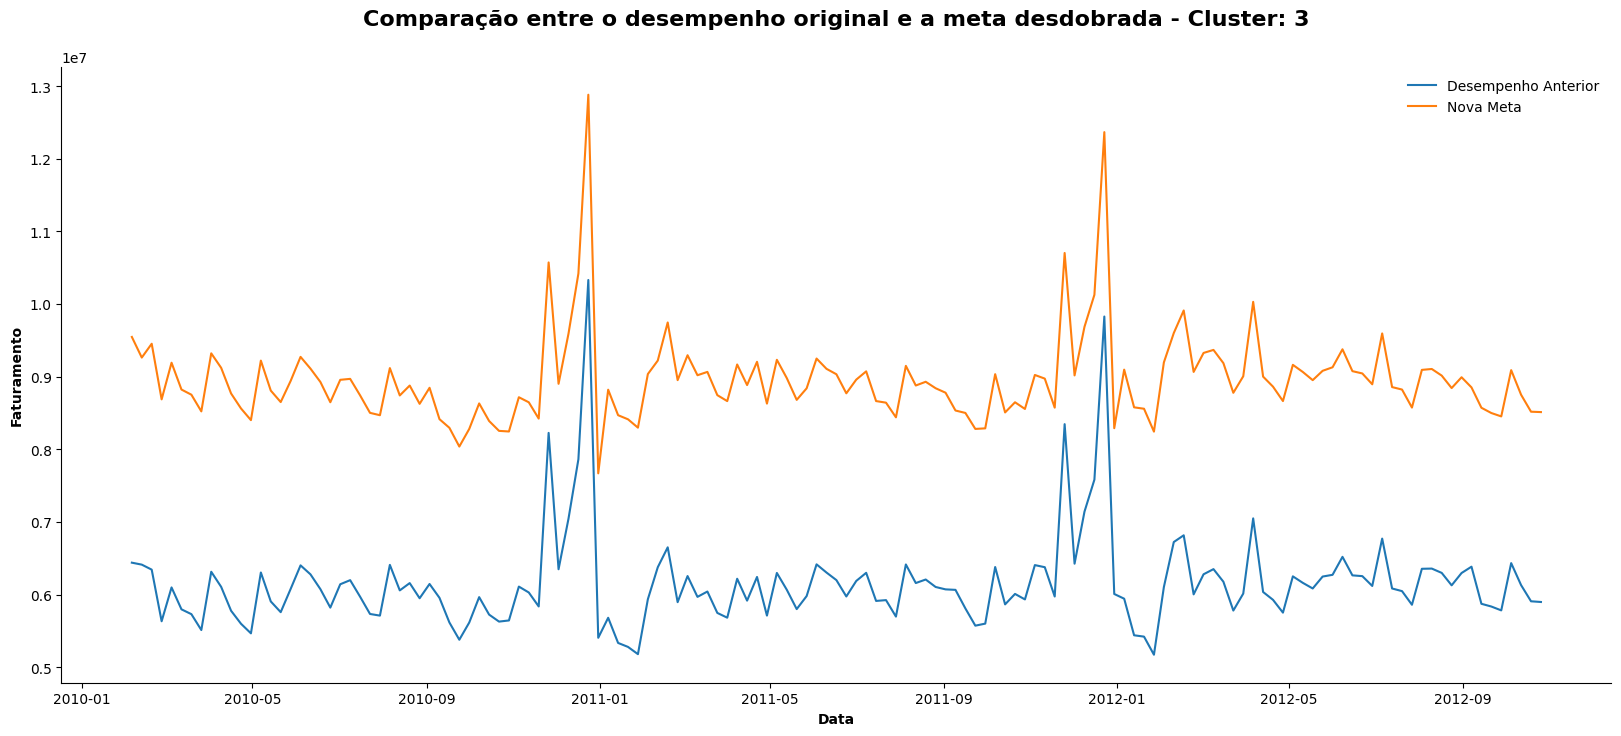

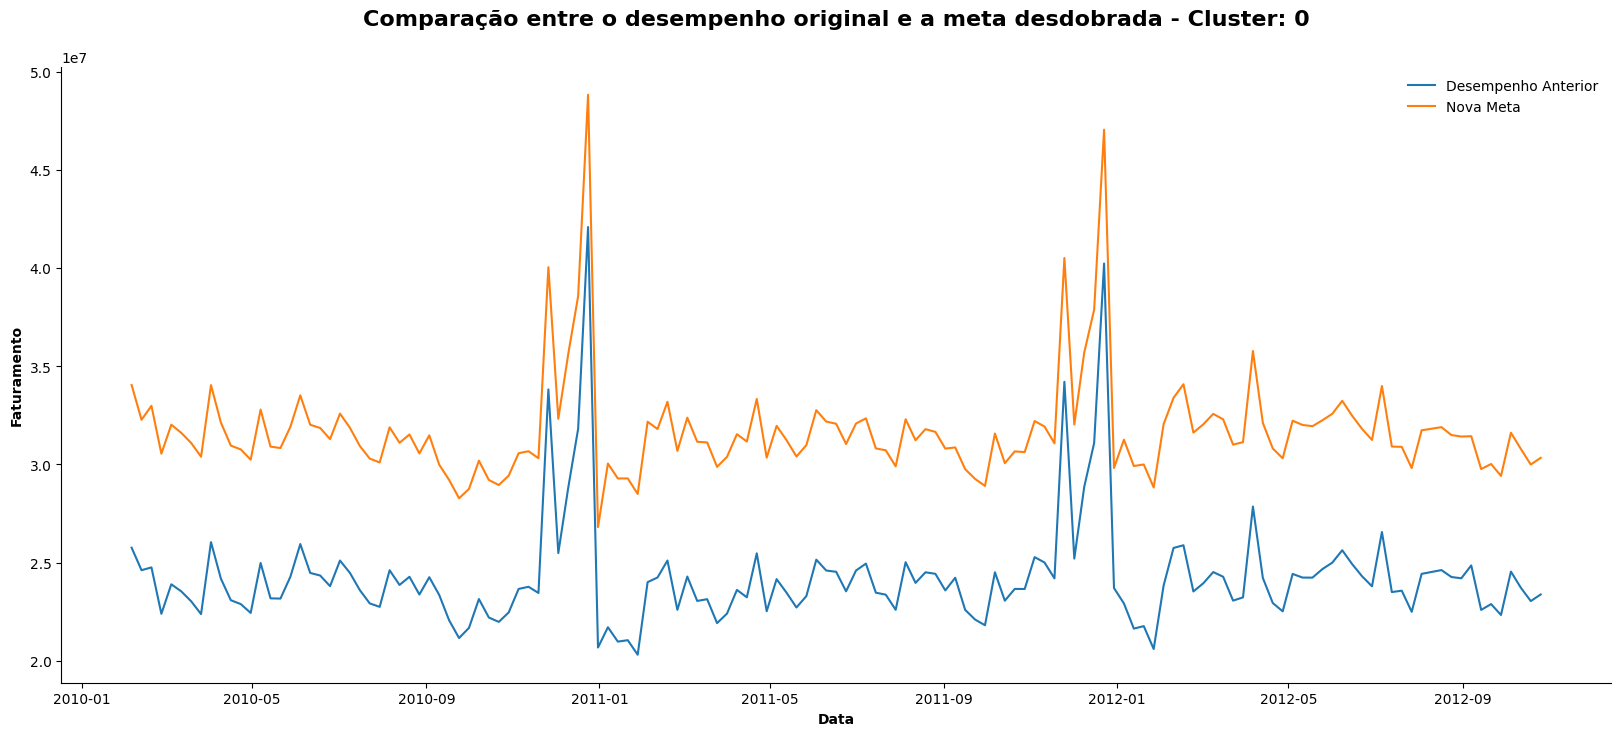

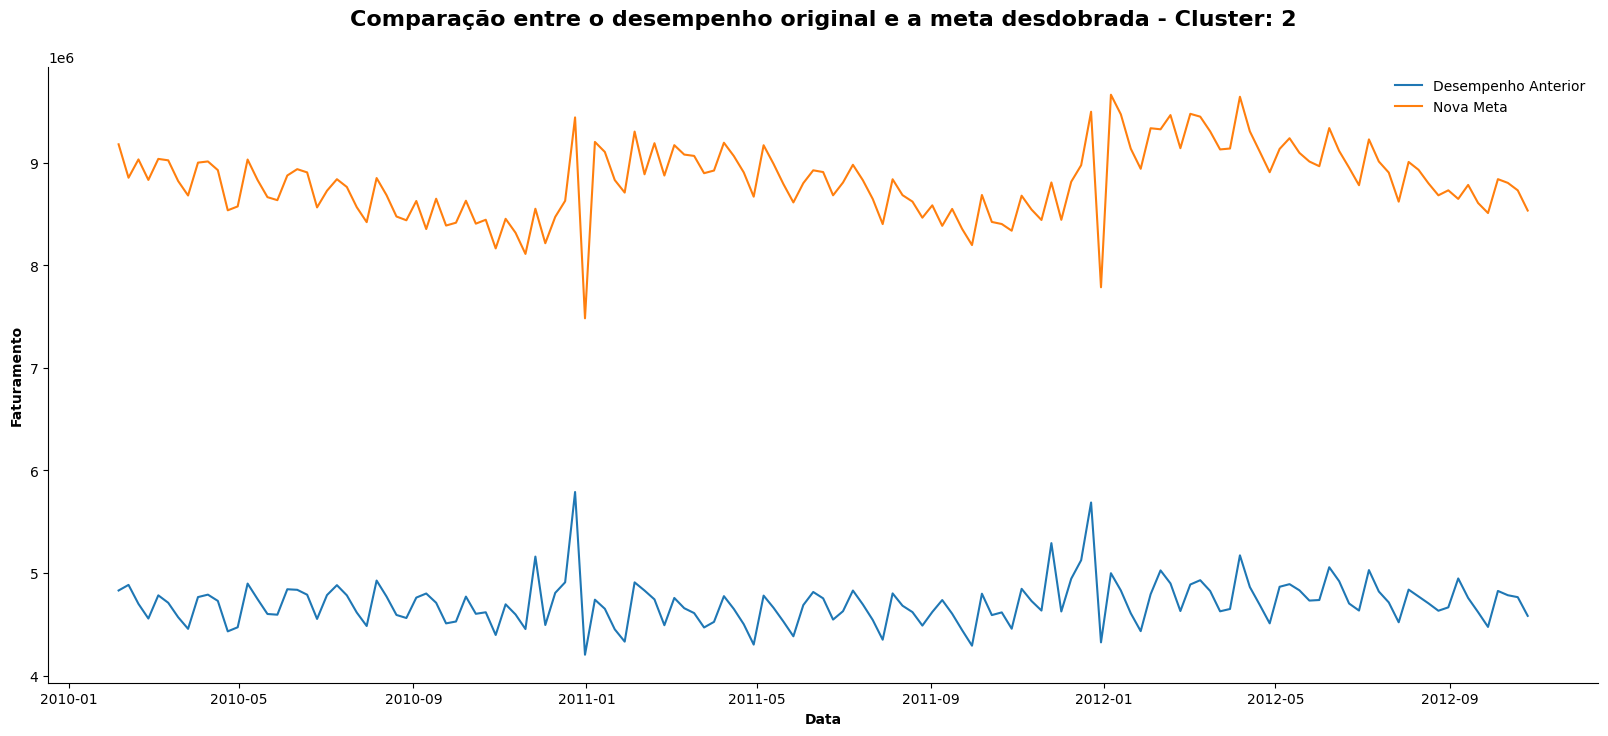

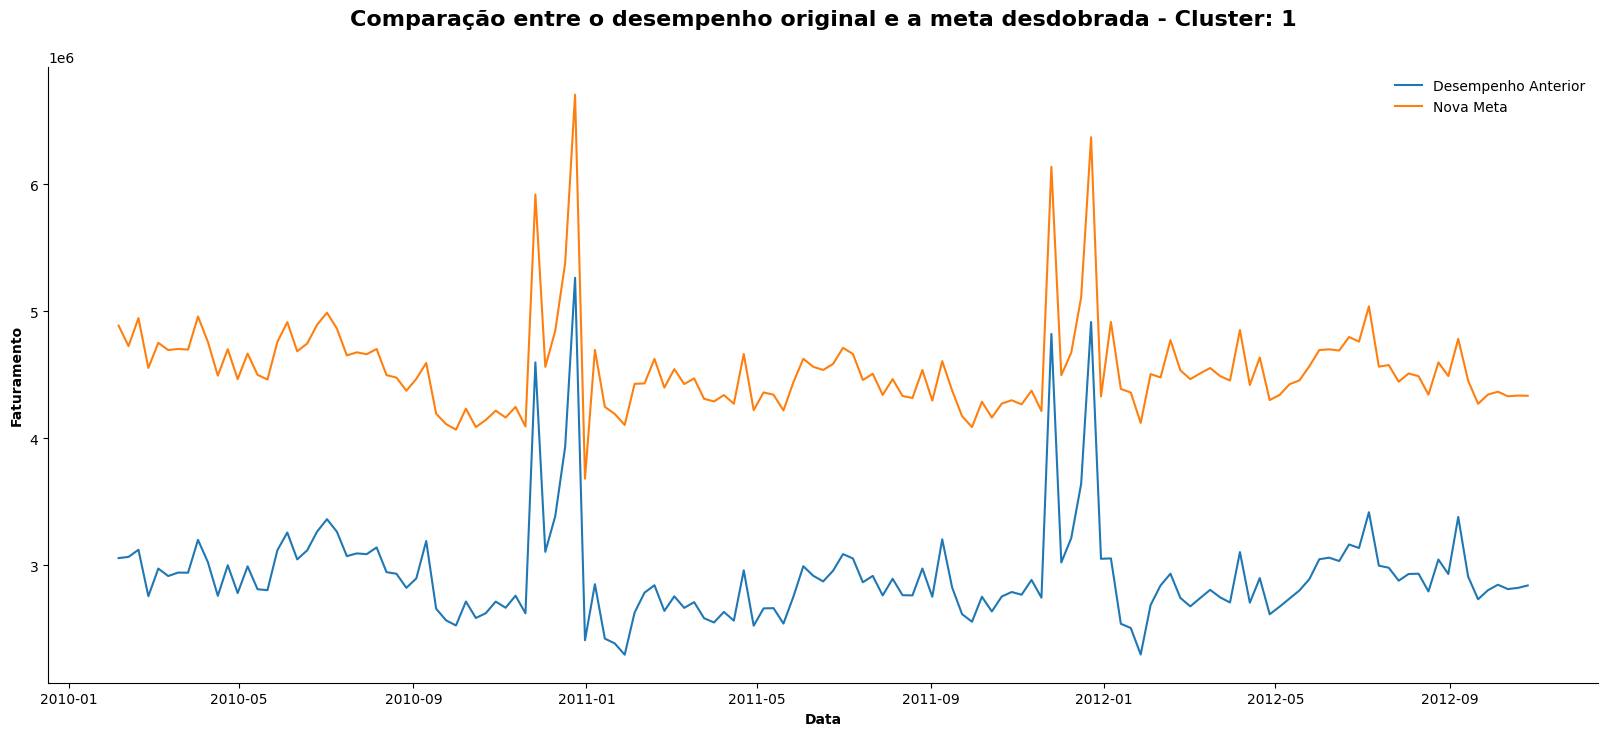

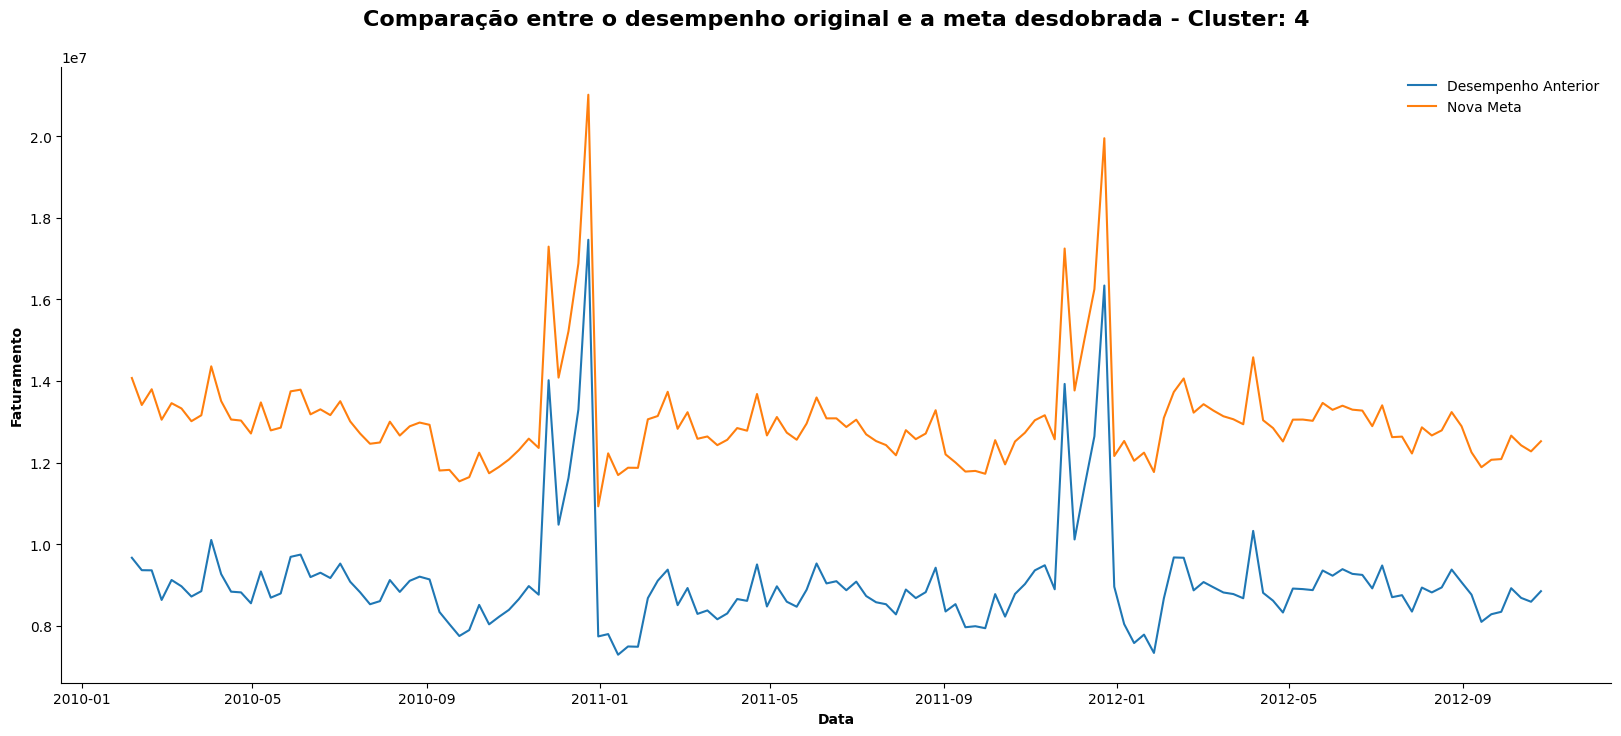

In [18]:
for cluster in df_final.cluster.unique():
    
    df_plot = df_final[df_final.cluster == cluster].groupby(['Date']).agg({
        'Weekly_Sales':'sum',
        'captura_lacuna':'sum'
    }).reset_index()
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.plot(df_plot.Date,df_plot.Weekly_Sales,label='Desempenho Anterior')
    plt.plot(df_plot.Date,df_plot.captura_lacuna,label='Nova Meta')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.title(f'Comparação entre o desempenho original e a meta desdobrada - Cluster: {cluster}', fontweight='bold', pad=30, font='Manrope', fontsize=16)
    plt.xlabel('Data', fontweight='bold')
    plt.ylabel('Faturamento', fontweight='bold')
    plt.legend(loc="upper right", framealpha=0)
    #fig.savefig(f"plots/{row['index']}.png", transparent=False, bbox_inches="tight")
    plt.show()

In [20]:
df_final.head(1)

,Date,IsHoliday,Store,Size,Dept,MarkDown5,Weekly_Sales,day_of_year,day_circle_x,day_circle_y,Month,Week,Weekly_Sales_pred,cluster,lacuna,captura_lacuna,year
0,2010-02-05,0,1,151315,1,0.0,24924.5,36,0.814292,0.580455,2,5,13212.268398,3,13746.067845,34546.747491,2010


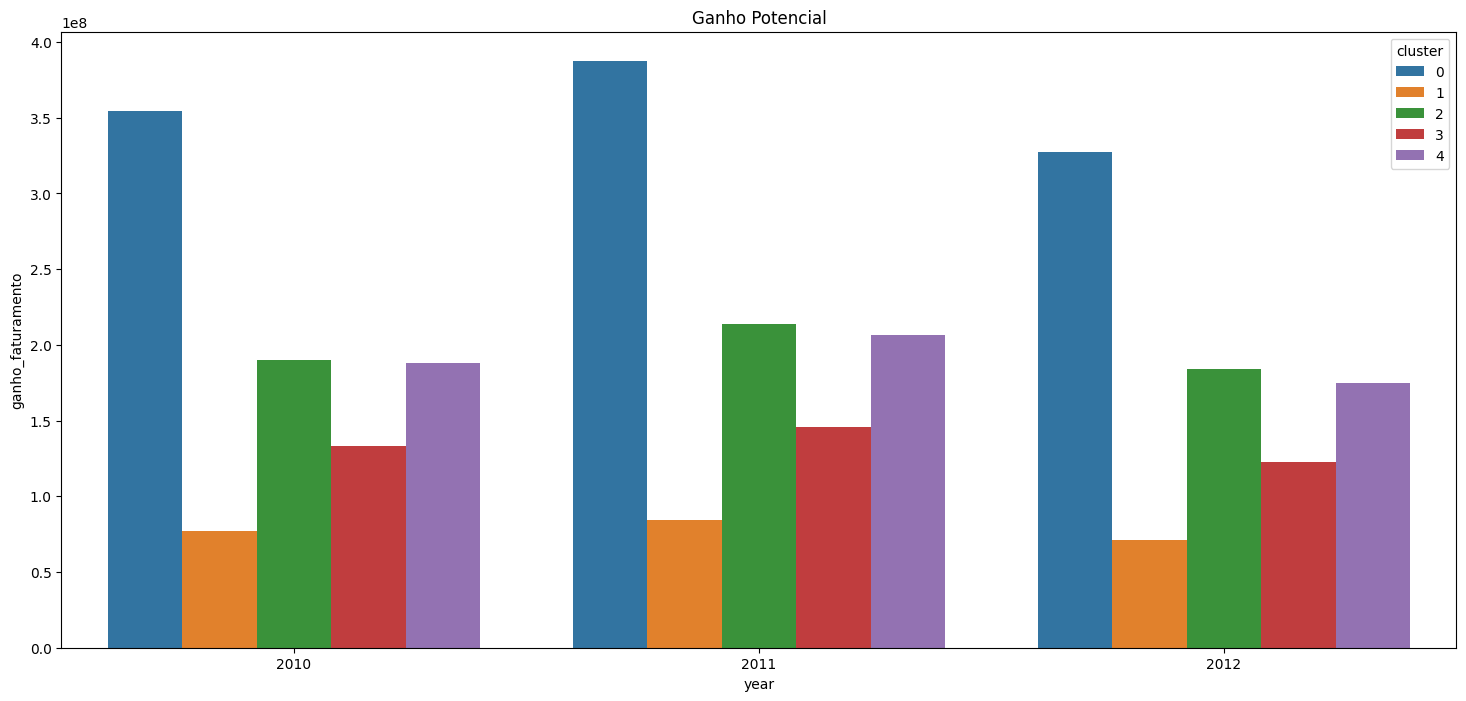

In [24]:
df_final['year'] = df_final.Date.dt.year
df_metrics = df_final.groupby(['cluster','year']).agg({
    'Weekly_Sales':'sum',
    'lacuna':'sum',
    'captura_lacuna':'sum'
}).reset_index()
df_metrics['ganho_faturamento'] = df_metrics.captura_lacuna - df_metrics.Weekly_Sales

df_metrics

fig, ax = plt.subplots(figsize=[18,8])

ax = sns.barplot(
    x='year',
    y='ganho_faturamento',
    hue='cluster',
    data=df_metrics
)

plt.title('Ganho Potencial')

plt.show()